In [35]:
import numpy as np
from scipy.io import loadmat
import cv2
import math
import matplotlib.pyplot as plt

### Load CASSI and Ours

In [36]:
occ = np.load('../dataset/hdr_datas/occ.npy')

In [37]:
recon_cassi = (loadmat('../CASSI/x_recon.mat')['x_recon'] * 255.)*occ[:,:,np.newaxis]
gt = (loadmat('../CASSI/x_recon.mat')['gt'] * 255.)*occ[:,:,np.newaxis]
recon_ours = (np.load('../opt_param_ours.npy') * 255.) * occ[:,:,np.newaxis]
recon_procam = (np.load('../opt_param.npy') * 255.) * occ[:,:,np.newaxis]

In [38]:
wvls = np.arange(430, 661, 10)

c:\Users\owner\anaconda3\envs\hyper3d\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


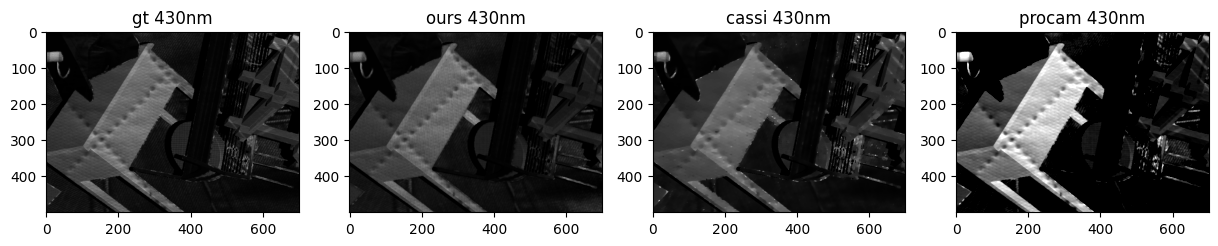

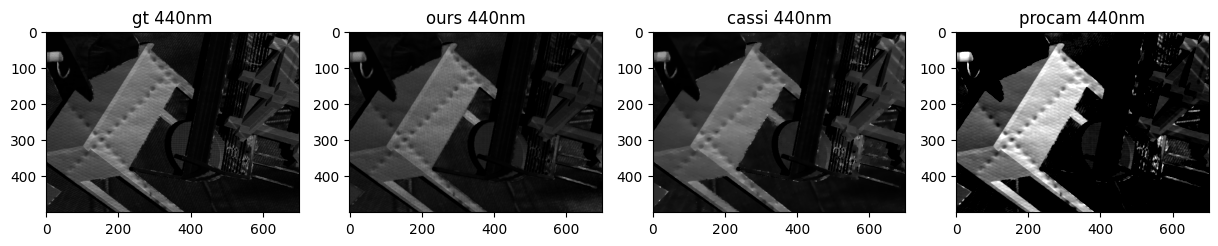

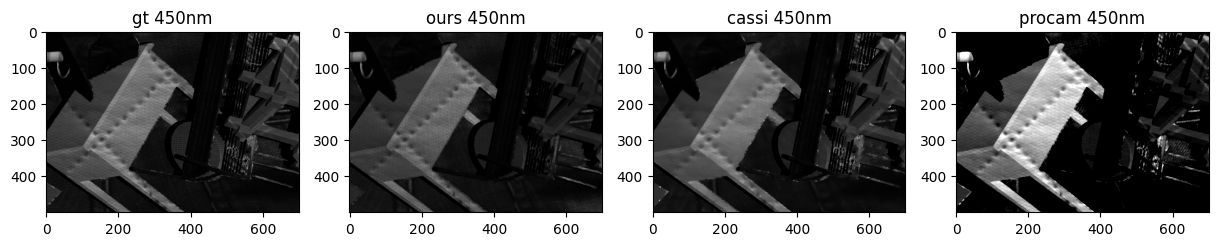

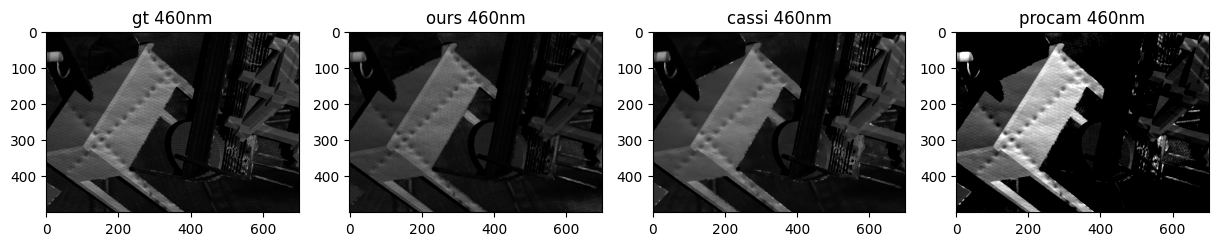

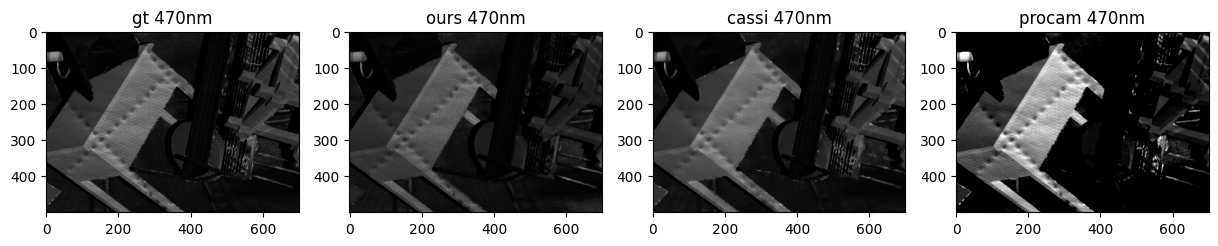

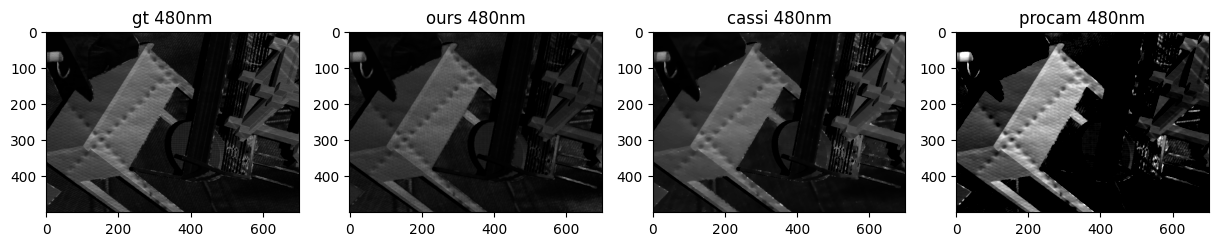

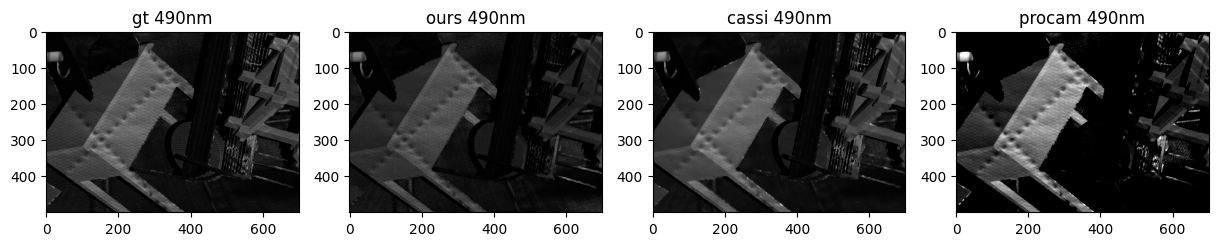

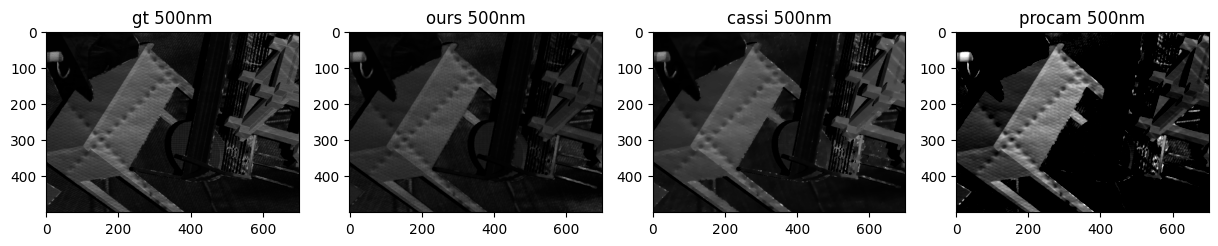

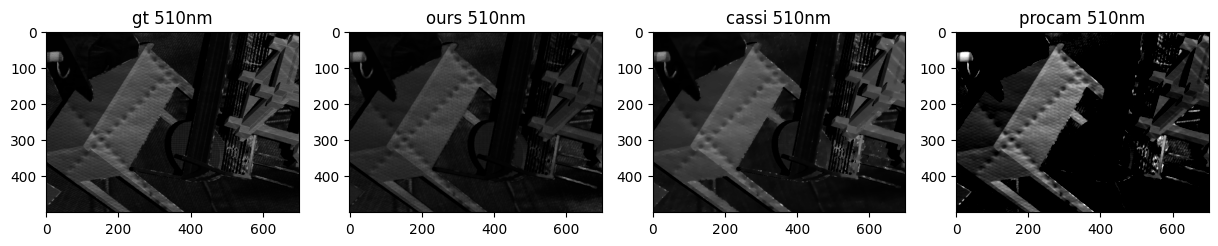

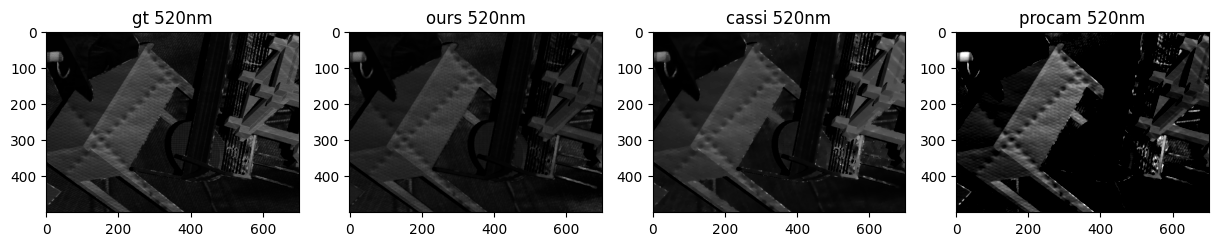

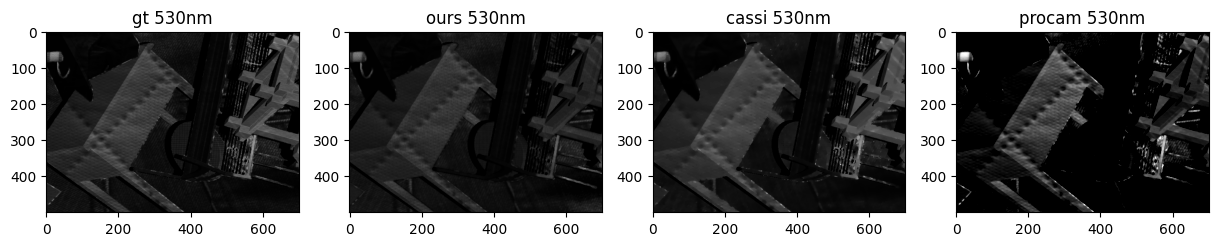

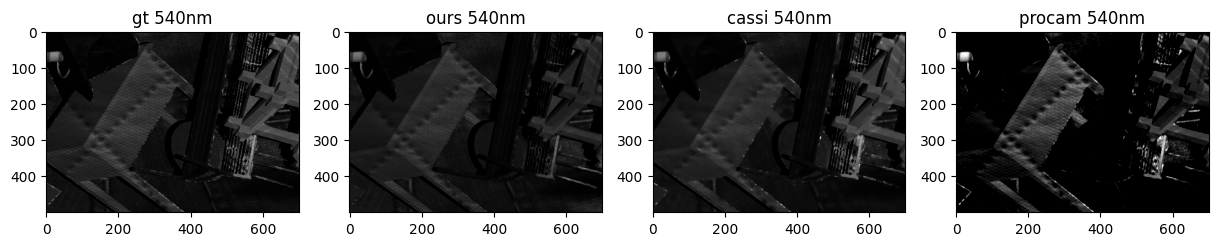

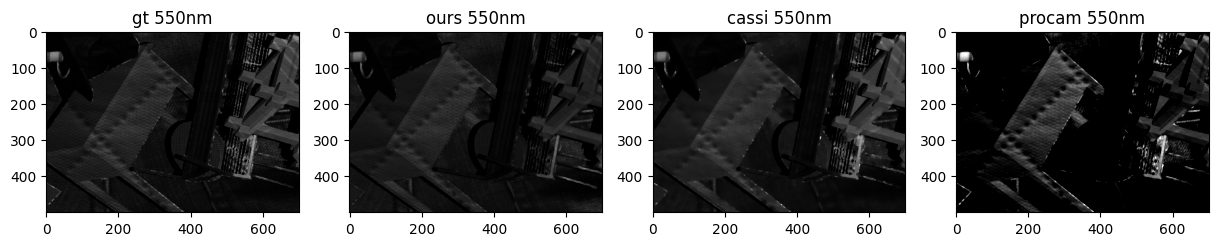

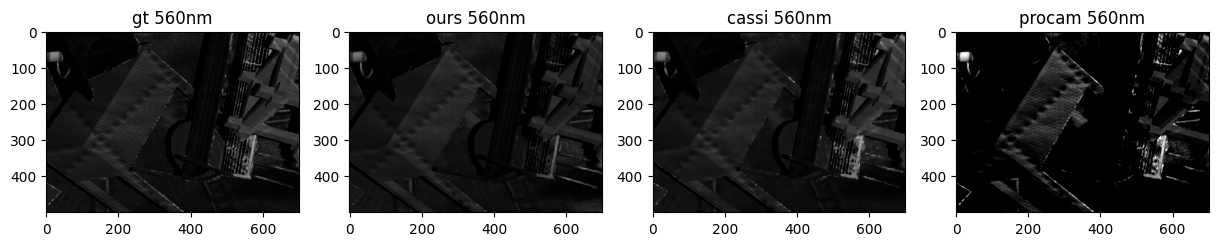

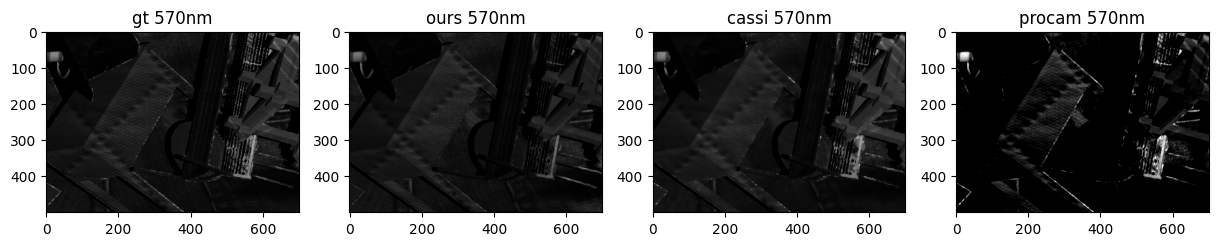

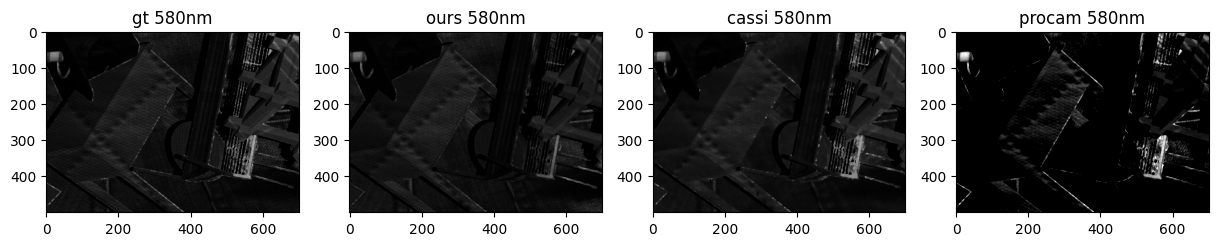

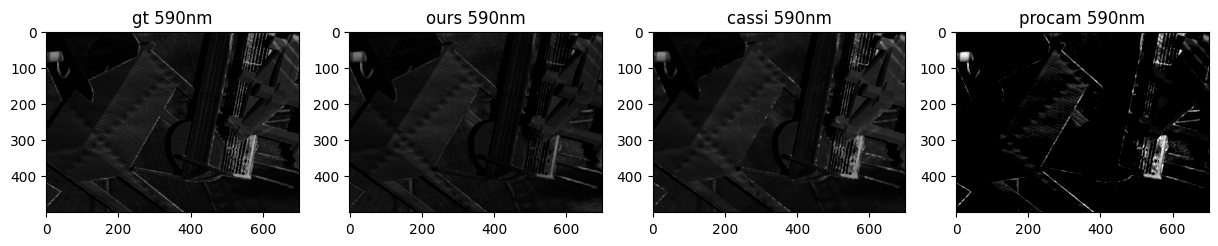

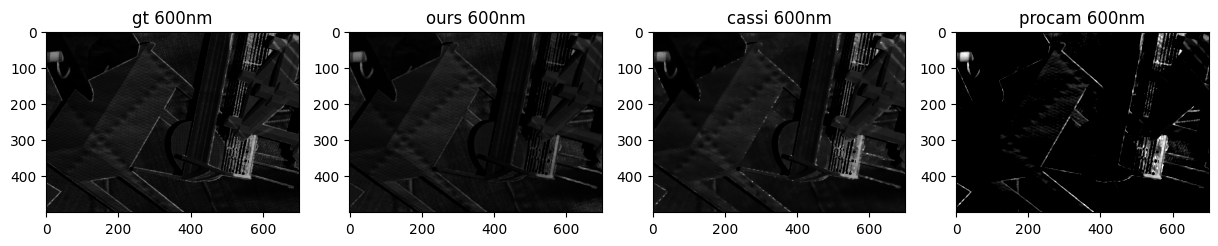

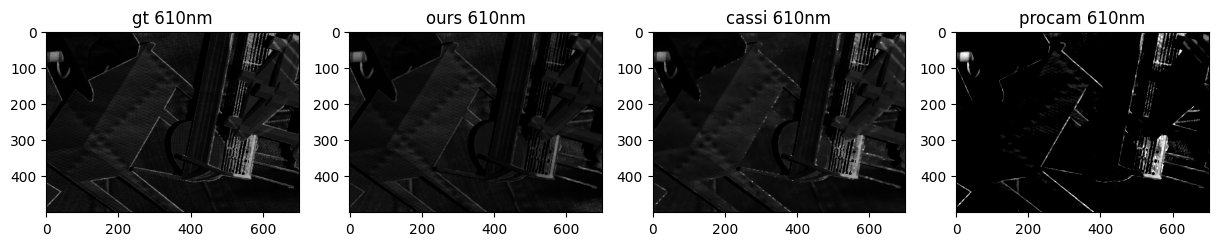

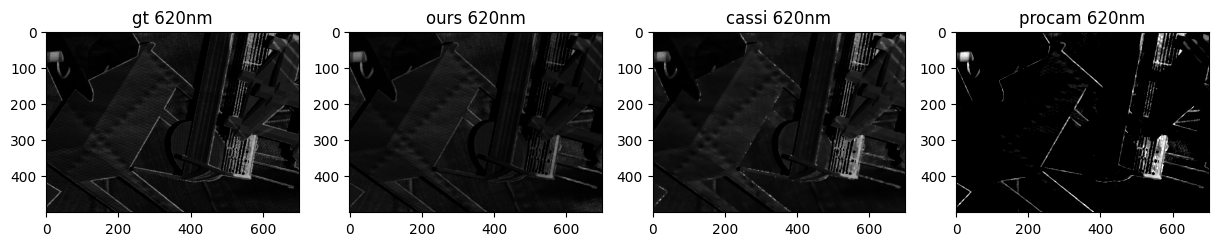

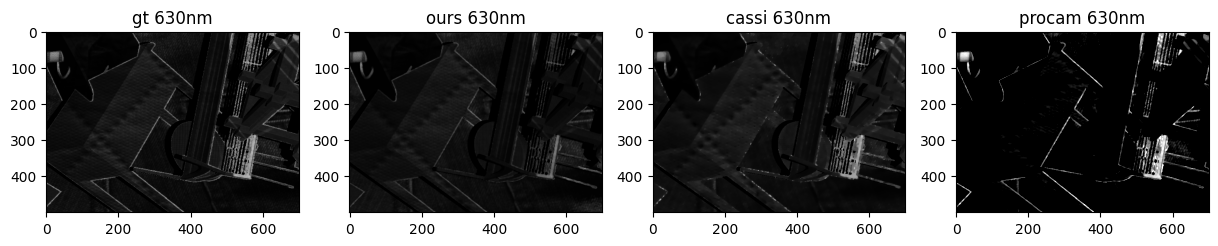

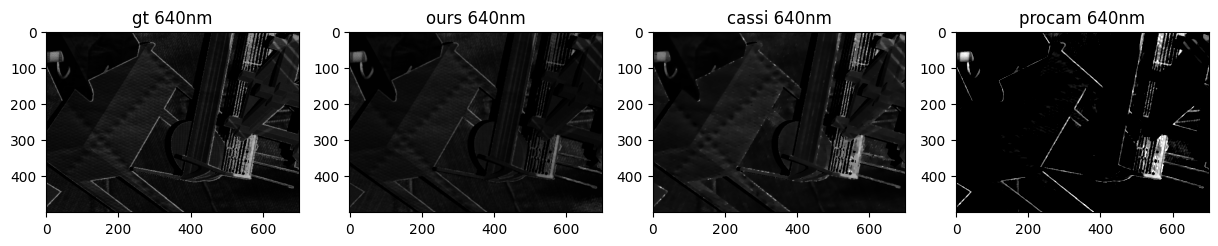

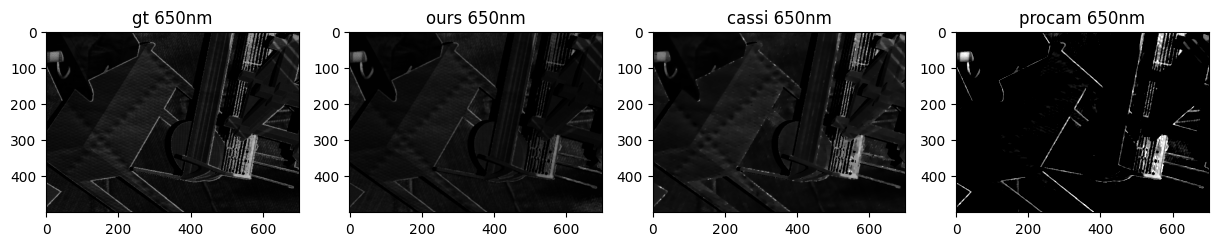

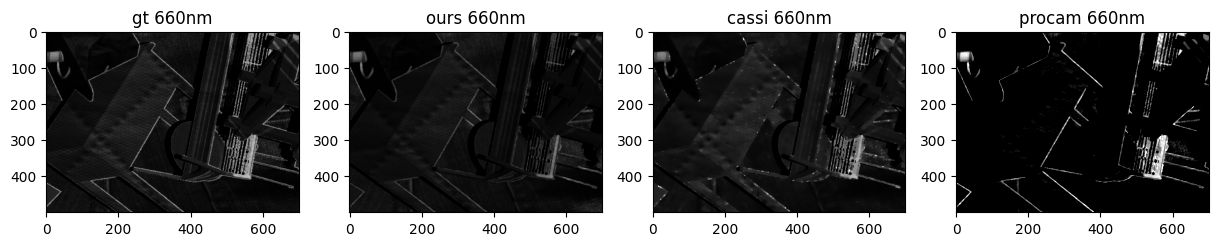

In [39]:
for i in range(24):
    plt.figure(figsize=(15,5))
    plt.subplot(141),plt.imshow(gt[:,:,i][50:550,150:850], cmap = 'gray', vmin = 0, vmax = 255), plt.title('gt %dnm'%wvls[i])
    plt.subplot(142),plt.imshow(recon_ours[:,:,i][50:550,150:850], cmap = 'gray', vmin = 0, vmax = 255), plt.title('ours %dnm'%wvls[i])
    plt.subplot(143),plt.imshow(recon_cassi[:,:,i][50:550,150:850], cmap = 'gray', vmin = 0, vmax = 255), plt.title('cassi %dnm'%wvls[i])
    plt.subplot(144),plt.imshow(recon_procam[:,:,i][50:550,150:850], cmap = 'gray', vmin = 0, vmax = 255), plt.title('procam %dnm'%wvls[i])

In [40]:
import math
import numpy as np

def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)[50:550,150:850]
    img2 = img2.astype(np.float64)[50:550,150:850]
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [41]:
def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)[50:550,150:850]
    img2 = img2.astype(np.float64)[50:550,150:850]
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()


def calculate_ssim(img1, img2):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')

In [42]:
psnr_ours = 0
for i in range(24):
    psnr_ours += calculate_psnr(gt[:,:,i], recon_ours[:,:,i])
print(psnr_ours / 24)

24.444507934724466


In [43]:
psnr_cassi = 0
for i in range(24):
    psnr_cassi += calculate_psnr(gt[:,:,i], recon_cassi[:,:,i])
print(psnr_cassi / 24)

29.498464629588057


In [44]:
psnr_procam = 0
for i in range(24):
    psnr_procam += calculate_psnr(gt[:,:,i], recon_procam[:,:,i])
print(psnr_procam / 24)

14.659464673034377


In [45]:
ssim_cassi = 0
for i in range(24):
    ssim_cassi += calculate_ssim(gt[:,:,i], recon_cassi[:,:,i])
print(ssim_cassi / 24)

0.8886224697483485


In [46]:
ssim_procam = 0
for i in range(24):
    ssim_procam += calculate_ssim(gt[:,:,i], recon_procam[:,:,i])
print(ssim_procam / 24)

0.0209377404150369


In [47]:
ssim_ours = 0
for i in range(24):
    ssim_ours += calculate_ssim(gt[:,:,i], recon_ours[:,:,i])
print(ssim_ours / 24)

0.8098994064014503
